In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#(1) Preprocessing: Detect face and eyes

In [3]:
img = cv2.imread(".\\dataset\\johnnydepp\\johnnydepp.jpg")
img.shape

(300, 300, 3)

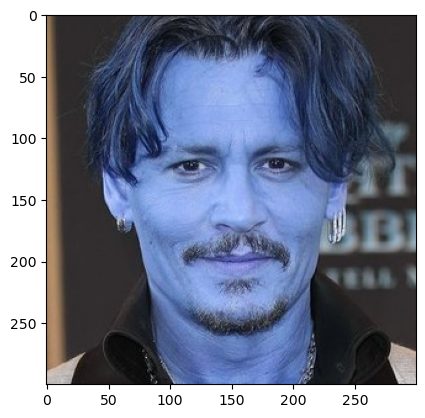

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(300, 300)

In [6]:
gray

array([[123, 115, 107, ...,  43,  43,  43],
       [123, 115, 107, ...,  43,  43,  43],
       [122, 114, 107, ...,  43,  43,  43],
       ...,
       [192, 195, 195, ..., 190, 191, 196],
       [183, 183, 183, ..., 195, 193, 205],
       [187, 184, 184, ..., 192, 196, 208]], dtype=uint8)

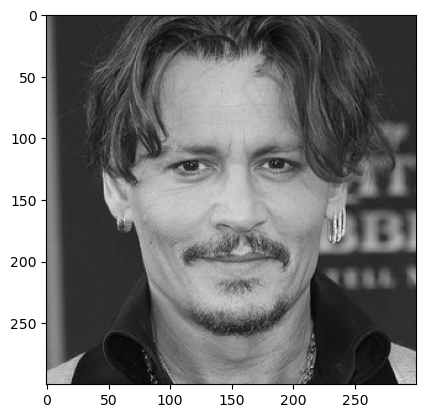

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
#haar casecading for face feature detection, by using open CV readymade apis which are linked below

In [9]:
face_cascade = cv2.CascadeClassifier(".\\opencv\\haarcascade\\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(".\\opencv\\haarcascade\\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[ 43,  42, 214, 214]])

In [10]:
#storing face in a rectangle(x,y.w.h)values

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(43, 42, 214, 214)

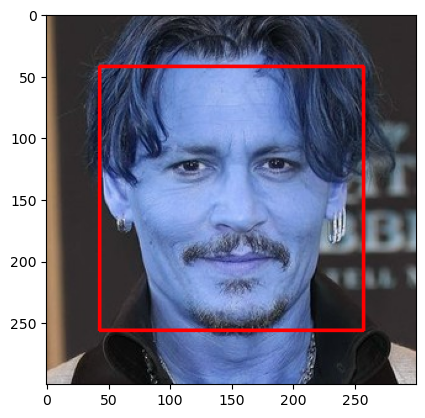

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [13]:
#hence face is detected, now lets draw two eyes from open cv documentation code

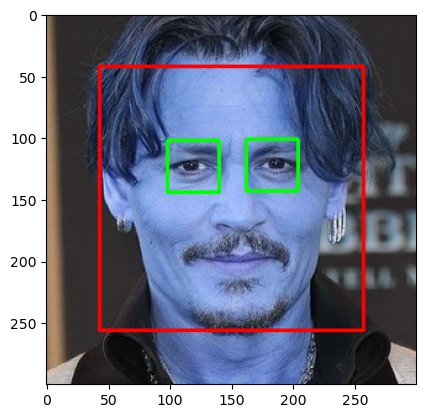

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [15]:
# Croping the facial region of the image

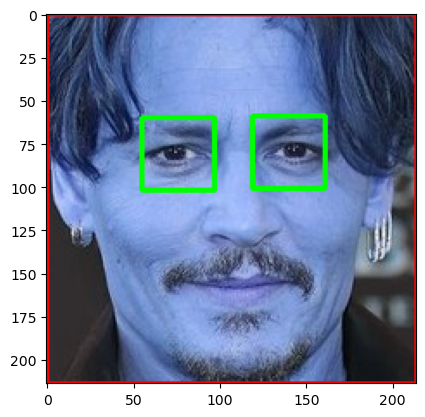

In [16]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [17]:
cropped_img = np.array(roi_color)
cropped_img.shape

(214, 214, 3)

In [18]:
#Feature Engineering
# Use wavelet transform images to extract feature of images and get a new image for traning the model

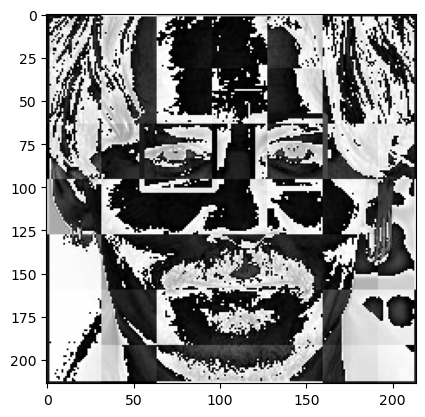

In [19]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):     #readymadefunction to read wavelength transformation from 'Stackoverflow'
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [20]:
# Load image, detect face. If eyes >=2, then save and crop the face region

In [21]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color  #function we gonna use later to save images

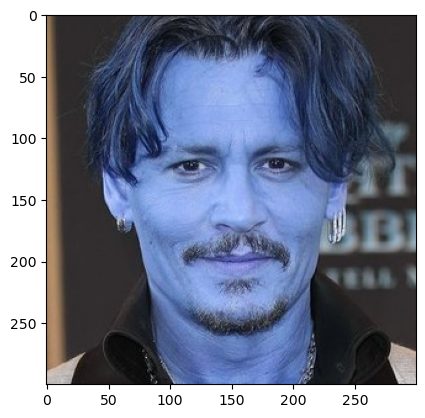

In [22]:
original_image = cv2.imread(".\\dataset\\johnnydepp\\johnnydepp.jpg")
plt.imshow(original_image)

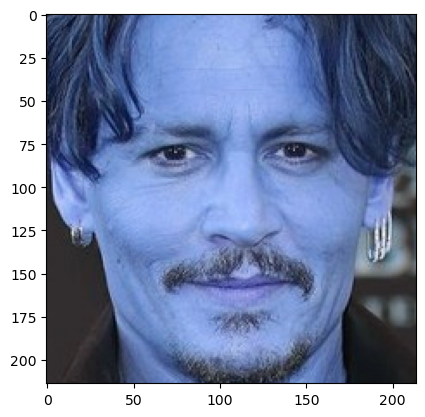

In [23]:
cropped_image = get_cropped_image_if_2_eyes(".\\dataset\\johnnydepp\\johnnydepp.jpg")
plt.imshow(cropped_image)

In [24]:
#In below image face is not very clear and it doesn't have two eyes clearly visible

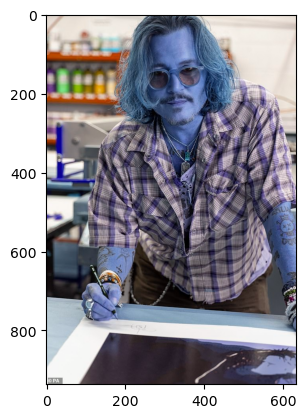

In [25]:
org_image_obstructed = cv2.imread(".\\dataset\\johnnydepp\\johnnydepp2.jpg")
plt.imshow(org_image_obstructed)

In [26]:
#if two eyes are not detected clearly , return noting

In [27]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(".\\dataset\\johnnydepp\\johnnydepp2.jpg")
cropped_image_no_2_eyes

In [28]:
#Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training

In [29]:
#creating a cropped folder and saving cropped images there which wil be used for datatraining

In [30]:
path_to_data = ".\\dataset\\"
path_to_cr_data = ".\\dataset\\cropped\\"

In [31]:
#saving path of original data set folder into python list

In [32]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [33]:
img_dirs

['.\\dataset\\dwaynejohnson',
 '.\\dataset\\emmawatson',
 '.\\dataset\\johnnydepp',
 '.\\dataset\\ladygaga',
 '.\\dataset\\leonardodicaprio']

In [34]:
#Go through all images in dataset folder and create cropped images for them. 

In [35]:
#if folder exists 'incase of multiple run' then remove it. and mkdir make directry will create that folder

In [36]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [37]:
cropped_image_dirs = []  #cropped images
celebrity_file_names_dict = {}   #original image directory
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):                  #iterating throught all folders and images
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:                             #if two eyes are cleared in the image then save it to the cropped folder
            cropped_folder = path_to_cr_data + celebrity_name    #croppedfolder + subfolder(of celeb name)
            if not os.path.exists(cropped_folder):     #if folder not exist then create it
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color) #directry path and roi_color teo eyes detection function we have created above use to save crop img
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path) #list of file path saving in a dictionary
            count += 1

Generating cropped images in folder:  .\dataset\cropped\dwaynejohnson
Generating cropped images in folder:  .\dataset\cropped\emmawatson
Generating cropped images in folder:  .\dataset\cropped\johnnydepp
Generating cropped images in folder:  .\dataset\cropped\ladygaga
Generating cropped images in folder:  .\dataset\cropped\leonardodicaprio


In [38]:
#Now we have cropped folder under datasets folder that contains cropped images
#Manually examine cropped folder and delete any unwanted images

In [39]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'.\\dataset\\cropped\\dwaynejohnson': ['.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson1.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson10.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson11.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson12.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson13.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson14.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson15.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson16.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson17.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson18.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson19.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson2.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson20.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson21.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohnson22.jpg',
  '.\\dataset\\cropped\\dwaynejohnson\\dwaynejohn

In [40]:
# since our x and y should be a number so here we are defining a class dic for celebrity just to assign them some numbers and using 'class_dict' for y.

In [41]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'.\\dataset\\cropped\\dwaynejohnson': 0,
 '.\\dataset\\cropped\\emmawatson': 1,
 '.\\dataset\\cropped\\johnnydepp': 2,
 '.\\dataset\\cropped\\ladygaga': 3,
 '.\\dataset\\cropped\\leonardodicaprio': 4}

In [42]:
#Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier.


In [43]:
#iteration through dictionary
#getting X and Y ready

In [44]:

X = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:     #our cropperd images file e.g .\\dataset\\cropped\\taylorswift\\taylorswift6.jpg'
        img = cv2.imread(training_image) #training_img will be the path of image and reading img through open cv
        if img is None:     #incase we get an error running this function just because we have manualy deleted some cropped images
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))   #scalling for images and resizing the raw image for train
        img_har = w2d(img,'db1',5)            #reading wavelength transform img
        scalled_img_har = cv2.resize(img_har, (32, 32))  #scaling wavelngthimages
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) #using numpy to stacking images verticaly
        X.append(combined_img)  #list of wavelength transfor images cropped
        y.append(class_dict[celebrity_name])     #celeb name

In [45]:
#X = []
#y = []

#for celebrity_name, training_files in celebrity_file_names_dict.items():
    #for training_image in training_files:
       # img = cv2.imread(training_image)
        #if img is None:
            #continue

        # Process the raw image
        #scalled_raw_img = cv2.resize(img, (32, 32))

       # X.append(scalled_raw_img)  # Append the processed raw image
       # y.append(class_dict[celebrity_name])

In [46]:
len(X)

214

In [47]:
32*32*3 + 32*32    #each element in x is and img and size of each image is 4096

4096

In [48]:
X[0]

array([[118],
       [139],
       [166],
       ...,
       [  7],
       [248],
       [  7]], dtype=uint8)

In [49]:
y[0]

0

In [50]:
#converting it to float to make sure that shape is 267 by 4096, images which are converted will be represented as float number

In [51]:
X = np.array(X).reshape(len(X),4096).astype(float)
#X = np.array(X).reshape(len(X), 32*32*3).astype(float)
X.shape

(214, 4096)

In [52]:
#Building and training a model

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [55]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C = 1.0, kernel = 'rbf'))]) # creating pipline to scale data and choosing parameters randomly 
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6481481481481481

In [56]:
#sample size

In [57]:
len(X_test)

54

In [58]:
#detail statistic 

In [59]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.92      0.69        12
           1       0.00      0.00      0.00         3
           2       0.69      0.85      0.76        13
           3       1.00      0.23      0.38        13
           4       0.67      0.77      0.71        13

    accuracy                           0.65        54
   macro avg       0.58      0.55      0.51        54
weighted avg       0.69      0.65      0.60        54



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [61]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [62]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [63]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [64]:
df

,model,best_score,best_params
0,svm,0.76875,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.53125,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.78750,{'logisticregression__C': 1}


In [65]:
# 'logistic_regression' is giving best score

In [66]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [67]:
best_estimators['svm'].score(X_test,y_test)

0.7592592592592593

In [68]:
best_estimators['random_forest'].score(X_test,y_test)

0.5925925925925926

In [69]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7407407407407407

In [70]:
#since 'logistic_regression' gave me best score , so im storing it into my best classifier

In [71]:
best_clf = best_estimators['logistic_regression']

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  2,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 2,  0,  9,  0,  2],
       [ 0,  1,  1, 11,  0],
       [ 2,  1,  1,  2,  7]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

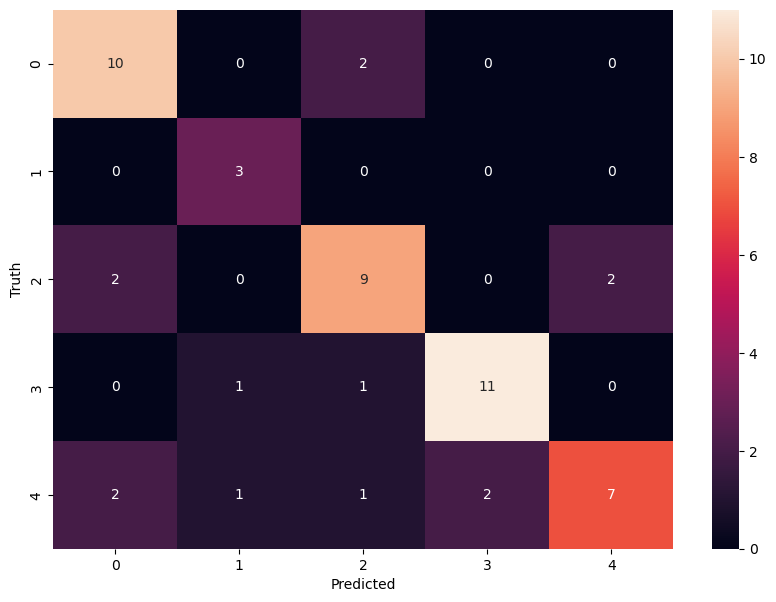

In [73]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
class_dict

{'.\\dataset\\cropped\\dwaynejohnson': 0,
 '.\\dataset\\cropped\\emmawatson': 1,
 '.\\dataset\\cropped\\johnnydepp': 2,
 '.\\dataset\\cropped\\ladygaga': 3,
 '.\\dataset\\cropped\\leonardodicaprio': 4}

In [75]:
#Save the trained model

In [76]:
#!pip install joblib

In [77]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [78]:
#Save class dictionary

In [79]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))